# Predicting Student Alcohol Consumption

## Basic Info

Group Members:

Elizabeth Armstrong  
elizabeth.armstrong@chemeng.utah.edu  
u0726588  

Nipun Gunawardena  
1.nipun@gmail.com  
u0624269  

Karen DeMille   
karen.demille@utah.edu   
u0787257    

## Background and Motivation
As recommended in class, our first goal was to find a dataset that was easily accessible but interesting. In the UCI Machine Learning Repository, we found a dataset describing high school student alcohol consumption. This is a potentially interesting dataset for several reasons. Underage drinking is a health problem, and understanding it better can lead to better treatment. As an alternate conclusion, rehabilitation efforts can be better focused if drinking isn't a large problem. Additionally, it would be interesting to see how alcohol consumption correlates with socioeconomic and educational factors. Finally, it would be very informative if we could find another dataset to compare with. If student alcohol consumption correlates well with general population alcohol consumption, future health problems can be prevented.

All the members of our group are engineers. While this topic doesn't really relate to any of our research topics, this project gives us the opportunity to work with human-oriented data, something that is sometimes lacking in our field. Ultimately, determining what factors lead to alcohol consumption can help policymakers come to better decisions.

## Project Objectives
This project will have two main objectives: General data exploration and alcohol consumption tendency prediction. General data exploration will let us find factors that are important to alcohol consumption in students, and any other interesting information. Developing a tool to predict alcohol consumption will be a proof of concept that could be used by future institutions. These objectives can be completed with the current tools and data we have access to. However, if we can find or gather more alcohol consumption data, we would like to also see how the existing dataset matches the new one. This extra data can also be used to test our predictive tool. Since our dataset is already quite clean, we are planning on spending most of our time on analysis.  

However, we have recently found other datasets that we may be able to incorporate into this project [2].  From these datasets, we hope to compare the alcohol consumption practices of students in the United States with the alcohol consumption practices of students in Portugal.  We are interested in seeing whether different cultures affect ones drinking practices.

## Data

We plan to use the data folder for the Student Alcohol Consumption Data Set from the UCI Machine Learning Repository. This webpage can be accessed at http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION. The data was collected at two secondary schools in Portugal. Datasets for attributes of secondary school students in a math course and a Portuguese language course can be downloaded as CSV files, which are part of a compressed folder accessed through the Data Folder link or directly from http://archive.ics.uci.edu/ml/machine-learning-databases/00356/. This data has been downloaded and included in the same folder as the Jupyter notebook to allow for easy access and importing. The file is read and printed below using pandas. The data attributes are separated by semicolons, making “;” the delimiter.

With permission, we would also like to create a survey for University of Utah students that collects some data on similar topics to the attributes in the student dataset from the UCI dataset. We would then hope to see where our class fits in to the model we will be creating for predicting alcohol consumption based on other traits. These attributes include sex, age, home to school travel time, weekly study time, extra-curricular activities, workday alcohol consumption, and weekend alcohol consumption to name a few.

There are 33 total attributes recorded in the UCI data sets to choose from. A full list and description of attributes included can be found on the website.

# Data Cleaning and Aquisition

Most of the data entries are strings, so the string entries will have to be converted to an integer value for processing. Many are binary ‘yes’ or ‘no’ answers, but some have more than two choices such as the father or mother’s job being ‘teacher’, ‘health’ care related, civil ‘services’, ‘at_home’, or ‘other.’

There are 395 entries for the math course data set and 649 entries for the Portuguese language dataset, giving a total of 1044 data entries. These datasets could be combined into one large set for analysis since the number of different attributes considered are the same for each course. There are some students that belong to both datasets. When the datasets are combined, we must find the duplicates to properly merge the two datasets.

In [37]:
import pandas as pd
import numpy as np

## Load Data
Load data and print number of points.

In [38]:
mathclass = pd.read_csv("student-mat.csv",delimiter=";") #math course csv
portclass = pd.read_csv("student-por.csv",delimiter=";") #portuguese language course csv

print('Math class data points: {}'.format(len(mathclass)))
print('Portuguese class data points: {}'.format(len(portclass)))
print('Total data points: {}'.format(len(mathclass)+len(portclass)))

Math class data points: 395
Portuguese class data points: 649
Total data points: 1044


## Define Groups of Columns

Groups of columns need to be defined for finding duplicates and merging datasets.

In [39]:
#define lists of column names
all_courseindependent = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                         'traveltime','studytime','failures','schoolsup','famsup','activities','nursery','higher','internet', \
                         'romantic','famrel','freetime','goout','Dalc','Walc','health']
all_ = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime', \
       'studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel', \
       'freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
student_merge = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']
math_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                'traveltime','studytime','failures','schoolsup','famsup','paid_math','activities','nursery','higher', \
                'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences_math','G1_math', \
                'G2_math','G3_math','math']
port_columns = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian', \
                'traveltime','studytime','failures','schoolsup','famsup','paid_port','activities','nursery','higher', \
                'internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences_port','G1_port', \
                'G2_port','G3_port','port']

## Choose Columns to Merge Datasets On

The data source states that there are 382 students that belong to both classes (math and Portuguese).  Included with the datasets was an example file of how to find the students which are included both datasets.  The example file merged the two datasets on the following columns: school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, nursery, and internet.

In [40]:
bothclass = pd.concat([portclass, mathclass])
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=student_merge).sum()))

Number of students in both classes: 382


Before going forward with the list of columns provided by the source, we will test whether the list includes enough columns to avoid incorrectly labeling data as a duplicate.

In [41]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=student_merge).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=student_merge).sum()))

Number of duplicates found in Portuguese class dataset: 12
Number of duplicates found in math class dataset: 4


Since duplicates appear to be present in the individual datasets when the list of columns provided by the source was used to find duplicates, we will determine if they are actually duplicates by comparing all of the columns in each dataframe.

In [42]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=all_).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=all_).sum()))

Number of duplicates found in Portuguese class dataset: 0
Number of duplicates found in math class dataset: 0


When we search for duplicates using all of the columns in each dataframe, no duplicates are found.  Thus, we can assume that the list of columns provided by the source for merging the dataframes is not suffucient to find true duplicates between the two datasets.  To determine whether the set of all columns will find duplicates betwwen the two datasets, we search for duplicates in the concatenated dataframe, considering all columns.

In [43]:
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=all_).sum()))

Number of students in both classes: 0


Using all of the columns to find duplicates between the datasets resulted in 0 duplicates being found.  Thus, there may be some columns which are based on the class which the student's data was aquired in.  From information about the columns, it appears that the following columns are class-specific:

* paid: extra paid classes within the course subject
* absences: number of school absences
* G1: first period grade
* G2: second period grade
* G3: third period grade

The class-specific columns were removed from the list of columns to consider when finding duplicates.  

In [44]:
#determine whether there are duplicates in the individual datasets
print('Number of duplicates found in Portuguese class dataset: {}'. \
      format(portclass.duplicated(keep='first',subset=all_courseindependent).sum()))
print('Number of duplicates found in math class dataset: {}'. \
      format(mathclass.duplicated(keep='first',subset=all_courseindependent).sum()))

Number of duplicates found in Portuguese class dataset: 2
Number of duplicates found in math class dataset: 0


In [45]:
print('Number of students in both classes: {}'.format(bothclass.duplicated(keep='first',subset=all_courseindependent).sum()))

Number of students in both classes: 322


When all columns except for the class-specific columns were considered, only 2 duplicates were found in the Portuguese class dataset and no duplicates were found in the math class.

In order to verify that all class-independent columns should be used to find duplicates between the two datasets, we added or omitted one column at a time from the list.  Whenever one of the five class-specific columns were included in the list, the number of duplicates reduced significantly.  On the other hand, when one class-independent column was omitted from the list, the number of duplicates did not change.

We will remove the 2 duplicate Portuguese class data points since the class-independent column list is the best we can do for finding duplicates between the Portuguese and math class datasets.  By removing these 2 false duplicates from the Portuguese class dataset, we can ensure that the merging of datasets is accurate.

## Find Duplicates and Merge Datasets

To prepare to merge mathclass and portclass dataframes, we will create columns for the class-specific columns which specify which class the values in the column are from.

In [46]:
mathclass['paid_math'] = mathclass['paid']
mathclass['absences_math'] = mathclass['absences']
mathclass['G1_math'] = mathclass['G1']
mathclass['G2_math'] = mathclass['G2']
mathclass['G3_math'] = mathclass['G3']
mathclass['math'] = 1

portclass['paid_port'] = portclass['paid']
portclass['absences_port'] = portclass['absences']
portclass['G1_port'] = portclass['G1']
portclass['G2_port'] = portclass['G2']
portclass['G3_port'] = portclass['G3']
portclass['port'] = 1

mathclass_merge = mathclass[math_columns]
portclass_merge = portclass[port_columns]

#remove duplicates from individual datasets based on class-independent column set
portclass_nodup = portclass_merge.drop_duplicates(subset=all_courseindependent,keep='first')
mathclass_nodup = mathclass_merge.drop_duplicates(subset=all_courseindependent,keep='first')

Merge mathclass and portclass dataframes

In [47]:
bothclass = pd.merge(portclass_nodup, mathclass_nodup, how='outer', on=all_courseindependent)
print(bothclass.columns.tolist())

bothclass

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid_port', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_port', 'G1_port', 'G2_port', 'G3_port', 'port', 'paid_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'math']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G1_port,G2_port,G3_port,port,paid_math,absences_math,G1_math,G2_math,G3_math,math
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0.0,11.0,11.0,1.0,no,6.0,5.0,6.0,6.0,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,9.0,11.0,11.0,1.0,no,4.0,5.0,5.0,6.0,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,12.0,13.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,GP,F,15,U,GT3,T,4,2,health,services,...,14.0,14.0,14.0,1.0,yes,2.0,15.0,14.0,15.0,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,11.0,13.0,13.0,1.0,yes,4.0,6.0,10.0,10.0,1.0
5,GP,M,16,U,LE3,T,4,3,services,other,...,12.0,12.0,13.0,1.0,yes,10.0,15.0,15.0,15.0,1.0
6,GP,M,16,U,LE3,T,2,2,other,other,...,13.0,12.0,13.0,1.0,no,0.0,12.0,12.0,11.0,1.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,10.0,13.0,13.0,1.0,no,6.0,6.0,5.0,6.0,1.0
8,GP,M,15,U,LE3,A,3,2,services,other,...,15.0,16.0,17.0,1.0,yes,0.0,16.0,18.0,19.0,1.0
9,GP,M,15,U,GT3,T,3,4,other,other,...,12.0,12.0,13.0,1.0,yes,0.0,14.0,15.0,15.0,1.0


To make sure that the merge was done properly, the numbers of students represented from each class are found.

In [48]:
#check that numbers work out

print('Total datasets from both classes: {}'.format(len(mathclass_nodup)+len(portclass_nodup)))
print('Length of dataset after duplicates removed: {}'.format(len(bothclass)))
print('Length of mathclass dataset: {}'.format(len(mathclass_nodup)))
print('Number of mathclass only in bothclass: {}'.format(len(bothclass[(bothclass['math']==1) & (bothclass['port']!=1)])))
print('Length of portclass dataset: {}'.format(len(portclass_nodup)))
print('Number of portclass only in bothclass: {}'.format(len(bothclass[(bothclass['math']!=1) & (bothclass['port']==1)])))
print('Number of mathclass AND portclass in bothclass: {}'.format(len(bothclass[(bothclass['math']==1) & (bothclass['port']==1)])))

Total datasets from both classes: 1042
Length of dataset after duplicates removed: 722
Length of mathclass dataset: 395
Number of mathclass only in bothclass: 75
Length of portclass dataset: 647
Number of portclass only in bothclass: 327
Number of mathclass AND portclass in bothclass: 320


The number of data points in the Portuguese class and math class add up to the total dataset length if no duplicates are removed.  Furthermore, when the number of duplicates is removed from each each class dataset, the number of students in only the math or Portuguese class is correct.  The number of duplicates plus the number of datapoints after duplicates were removed equals the total number of datasets.


## Assign Integer Values to String Entries

In [49]:
bothclass['school_num'] = bothclass['school'].map({'GP':0, 'MS':1})
bothclass['sex_num'] = bothclass['sex'].map({'F':0, 'M':1})
bothclass['address_num'] = bothclass['address'].map({'U':0, 'R':1})
bothclass['famsize_num'] = bothclass['famsize'].map({'LE3':0, 'GT3':1})
bothclass['Pstatus_num'] = bothclass['Pstatus'].map({'T':0, 'A':1})
bothclass['Mjob_num'] = bothclass['Mjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
bothclass['Fjob_num'] = bothclass['Fjob'].map({'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4})
bothclass['reason_num'] = bothclass['reason'].map({'home':0, 'reputation':1, 'course':2, 'other':3})
bothclass['guardian_num'] = bothclass['guardian'].map({'mother':0, 'father':1, 'other':2})
bothclass['schoolsup_num'] = bothclass['schoolsup'].map({'yes':0, 'no':1})
bothclass['famsup_num'] = bothclass['famsup'].map({'yes':0, 'no':1})
bothclass['activities_num'] = bothclass['activities'].map({'yes':0, 'no':1})
bothclass['nursery_num'] = bothclass['nursery'].map({'yes':0, 'no':1})
bothclass['higher_num'] = bothclass['higher'].map({'yes':0, 'no':1})
bothclass['internet_num'] = bothclass['internet'].map({'yes':0, 'no':1})
bothclass['romantic_num'] = bothclass['romantic'].map({'yes':0, 'no':1})
bothclass['paid_port_num'] = bothclass['paid_port'].map({'yes':0, 'no':1})
bothclass['paid_math_num'] = bothclass['paid_math'].map({'yes':0, 'no':1})

In [50]:
#combine columns that are class-dependent
bothclass = bothclass.fillna(value=0)
bothclass['paid_num'] = bothclass['paid_port_num'] + bothclass['paid_math_num'] #number of paid classes
bothclass['paid_num'] = bothclass['paid_num'].map({2:1, 1:1, 0:0}) #make 1 or 0 value rather than 0, 1, or 2
bothclass['absences'] = (bothclass['absences_port'] + bothclass['absences_math'])/2 #average absences per class
bothclass['G1'] = (bothclass['G1_port'] + bothclass['G1_math'])/2 #average first period grade
bothclass['G2'] = (bothclass['G2_port'] + bothclass['G2_math'])/2 #average second period grade
bothclass['G3'] = (bothclass['G3_port'] + bothclass['G3_math'])/2 #average third period grade

bothclass[['paid_num','absences','G1','G2','G3']]

,paid_num,absences,G1,G2,G3
0,1,5.0,2.5,8.5,8.5
1,1,3.0,7.0,8.0,8.5
2,1,3.0,6.0,6.5,6.0
3,1,1.0,14.5,14.0,14.5
4,1,2.0,8.5,11.5,11.5
5,1,8.0,13.5,13.5,14.0
6,1,0.0,12.5,12.0,12.0
7,1,4.0,8.0,9.0,9.5
8,1,0.0,15.5,17.0,18.0
9,1,0.0,13.0,13.5,14.0


## Save Cleaned Data to New CSV

In [51]:
bothclass.to_csv('CleanData.csv', sep=',', na_rep=np.nan)

# Exploratory Data Analysis

In [52]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## Import and Observe Basic Statistics

In [53]:
#Import merged, cleaned data set, print shape and data types and basic stats
#data set comes from Data_Cleanup_v2 in Data Cleanup
Cleaned_data = pd.read_csv("CleanData.csv")
print(Cleaned_data.shape)
print(Cleaned_data.dtypes, '\n')
Cleaned_data.describe()

(722, 64)
Unnamed: 0          int64
school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime          int64
studytime           int64
failures            int64
schoolsup          object
famsup             object
paid_port          object
activities         object
nursery            object
higher             object
internet           object
romantic           object
famrel              int64
freetime            int64
goout               int64
Dalc                int64
Walc                int64
health              int64
                   ...   
port              float64
paid_math          object
absences_math     float64
G1_math           float64
G2_math           float64
G3_math           float64
math              float64
sc

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,higher_num,internet_num,romantic_num,paid_port_num,paid_math_num,paid_num,absences,G1,G2,G3
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,...,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,360.500000,16.818560,2.484765,2.286704,1.566482,1.918283,0.344875,3.915512,3.200831,3.195291,...,0.113573,0.232687,0.623269,0.842105,0.296399,0.929363,3.199446,8.096260,8.119114,8.189058
std,208.567735,1.271272,1.126119,1.090657,0.747913,0.816082,0.730859,0.947913,1.061153,1.173839,...,0.317512,0.422837,0.484903,0.364895,0.456986,0.256395,4.375775,3.896469,3.990411,4.200826
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000
25%,180.250000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,5.000000,5.000000
50%,360.500000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,7.000000,7.000000,7.000000
75%,540.750000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,11.000000,11.500000,11.500000
max,721.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,18.500000,18.500000,18.500000


## Drinking Histogram

# TODO - Remove?

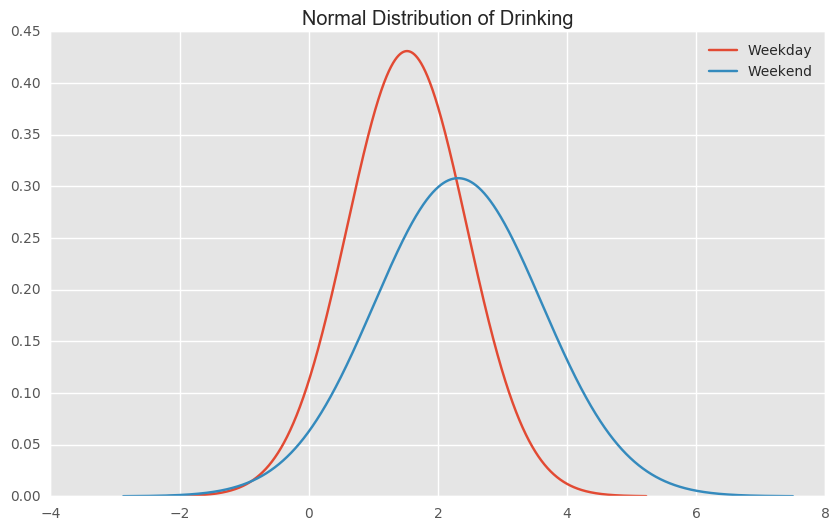

In [88]:
#cumulative distribution of weekday and weekend alcohol consumption from cleaned data set
mean_wd = Cleaned_data['Dalc'].mean()
mean_we = Cleaned_data['Walc'].mean()
std_wd = Cleaned_data['Dalc'].std()
std_we = Cleaned_data['Walc'].std()

x_wd = scipy.arange(mean_wd-4*std_wd,mean_wd+4*std_wd,0.001)
dist_wd = norm.pdf(x_wd, loc=mean_wd, scale=std_wd)
plt.plot(x_wd,dist_wd,label='Weekday')

x_we = scipy.arange(mean_we-4*std_we,mean_we+4*std_we,0.001)
dist_we = norm.pdf(x_we, loc=mean_we, scale=std_we)
plt.plot(x_we,dist_we,label='Weekend')

plt.legend(loc='best')
plt.title('Normal Distribution of Drinking')
plt.show()

Weekday and weekend alcohol consumption don't appear to be very different from each other. Which might be expected as a person that drinks more on weekdays is also expected to drink more on weekends.  In our final analysis, we will perform hypothesis tests to determine if weekday and weekend alcohol consumption is similar.

## Numerical Only Statistics

In [55]:
# Only use columns with numbers involved:
chosen_columns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

In [56]:
#cleaned data - only numbers
print(Cleaned_data.shape, '\n')
print(Cleaned_data.describe(), '\n')

(722, 35) 

             Dalc        Fedu          G1          G2          G3        Medu  \
count  722.000000  722.000000  722.000000  722.000000  722.000000  722.000000   
mean     1.520776    2.286704    8.096260    8.119114    8.189058    2.484765   
std      0.925961    1.090657    3.896469    3.990411    4.200826    1.126119   
min      1.000000    0.000000    1.500000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    5.000000    5.000000    5.000000    2.000000   
50%      1.000000    2.000000    7.000000    7.000000    7.000000    2.000000   
75%      2.000000    3.000000   11.000000   11.500000   11.500000    4.000000   
max      5.000000    4.000000   18.500000   18.500000   18.500000    4.000000   

             Walc    absences         age    failures     ...      reason_num  \
count  722.000000  722.000000  722.000000  722.000000     ...      722.000000   
mean     2.311634    3.199446   16.818560    0.344875     ...        1.409972   
std      1.2959

## Alcohol Consumption

Number counts for weekend alcohol consumption ratings:
1    270
2    162
3    138
4     99
5     53
Name: Walc, dtype: int64 

Number counts for weekday alcohol consumption ratings:
1    490
2    144
3     51
5     19
4     18
Name: Dalc, dtype: int64 



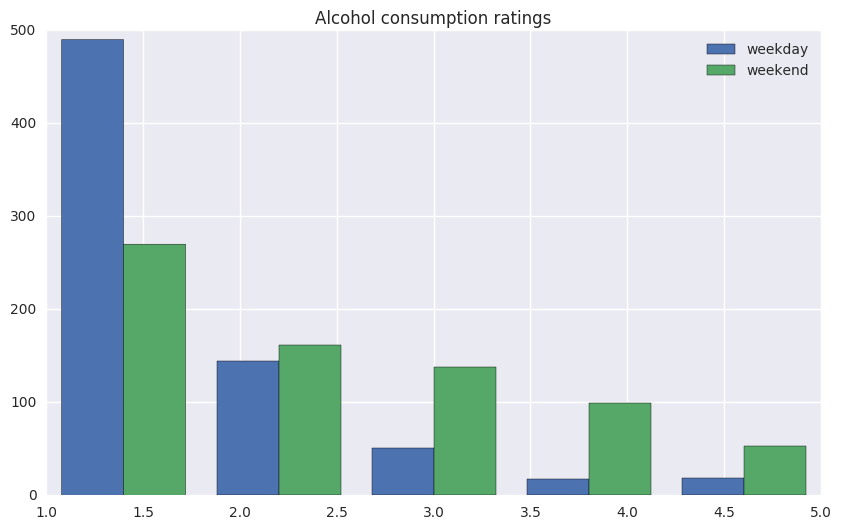

In [57]:
print('Number counts for weekend alcohol consumption ratings:')
print(Cleaned_data['Walc'].value_counts(), '\n')
print('Number counts for weekday alcohol consumption ratings:')
print(Cleaned_data['Dalc'].value_counts(), '\n')

data =[Cleaned_data["Dalc"], Cleaned_data["Walc"]]
n_bins = 5
plt.hist(data, n_bins, label=['weekday','weekend'],histtype='bar');
plt.title('Alcohol Consumption Values')
plt.legend(loc='upper right')
plt.show()

More of the students ranked their alcohol consumption higher on weekends than they did on weekdays. (53 compared to 19 for a rating of 5 or very high). Also, more of the students ranked their alcohol consumption lower on weekdays than they did on weekends. (490 compared to 270 for a rating of 1 or very low). Most students had lower alcohol consumption ratings for both weekends and weekdays, with the highest count being a rating of 1 for a weekday.

## Correlations

In [58]:
print(Cleaned_data.corr())

                    Dalc      Fedu        G1        G2        G3      Medu  \
Dalc            1.000000 -0.009340 -0.140386 -0.133925 -0.139447 -0.013662   
Fedu           -0.009340  1.000000  0.304687  0.301265  0.290571  0.643285   
G1             -0.140386  0.304687  1.000000  0.966036  0.946660  0.345109   
G2             -0.133925  0.301265  0.966036  1.000000  0.973615  0.348404   
G3             -0.139447  0.290571  0.946660  0.973615  1.000000  0.339901   
Medu           -0.013662  0.643285  0.345109  0.348404  0.339901  1.000000   
Walc            0.618160  0.024033 -0.121173 -0.117688 -0.116694 -0.033332   
absences        0.114163  0.111805  0.151397  0.136947  0.145267  0.137691   
age             0.134580 -0.135485 -0.215848 -0.214732 -0.220816 -0.119645   
failures        0.103143 -0.179895 -0.416399 -0.426899 -0.444780 -0.174764   
famrel         -0.084117  0.031512  0.068295  0.070865  0.080122  0.031925   
freetime        0.122081  0.002910 -0.026821 -0.038739 -0.040888

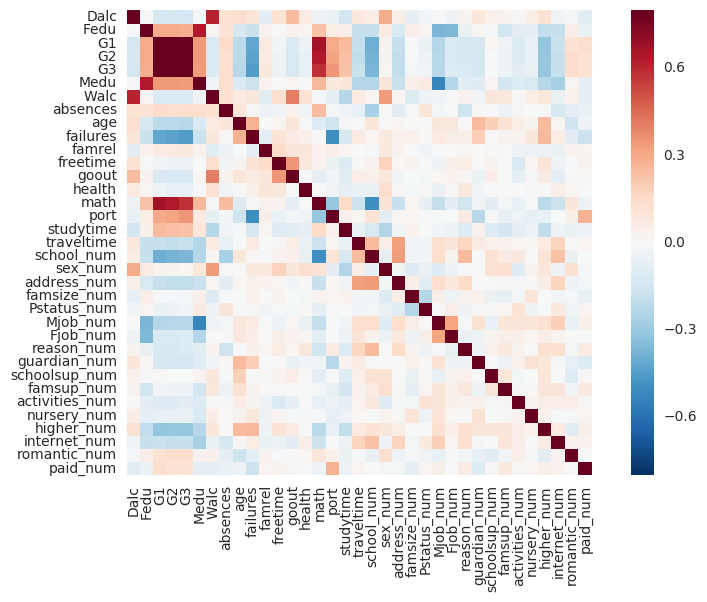

In [59]:
sns.heatmap(Cleaned_data.corr(), vmax=.8, square=True)

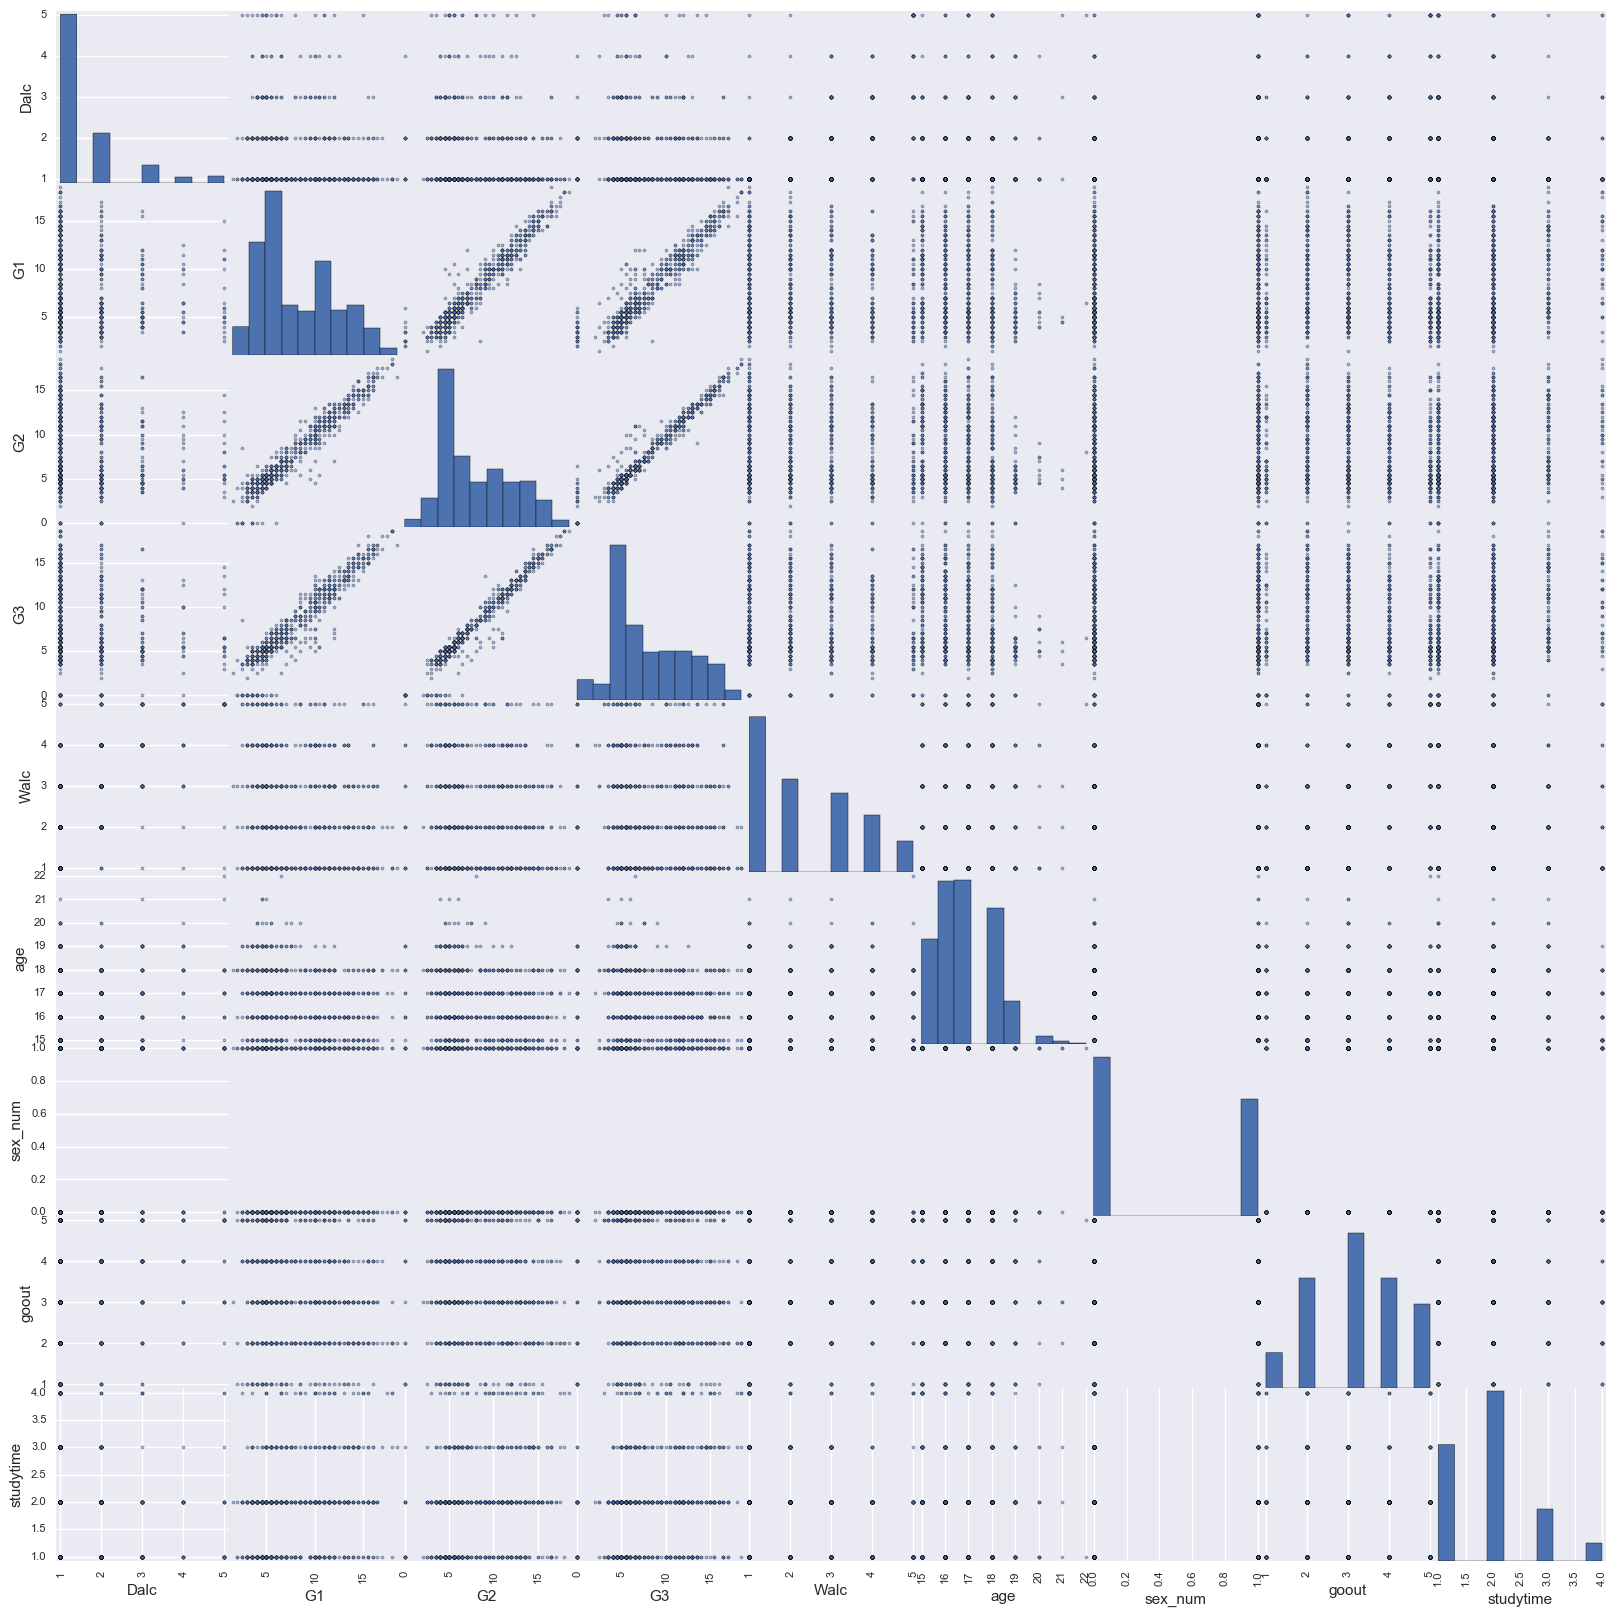

In [60]:
#looking for correlations
scatter_columns = ['Dalc', 'G1', 'G2', 'G3', 'Walc','age', 'sex_num','goout','studytime']

pd.scatter_matrix(
    Cleaned_data[scatter_columns],
    figsize=(20, 20), diagonal='hist'); 

No correlations between weekday or weekend alcohol consumption ratings with any other variables really stand out. There is a correlation of about 62% between weekend and weekday alcohol consumption. This is expected to be high as someone that drinks more during the weekday is expected to drink more during the weekend. There is also a relatively high correlation for both of these variables with a students ranking of how often they go out, especially with weekend alcohol consumption (~41%). This is also expected as going out more often tends to lead to drinking more often. Whether you are male or female, and studytime also has a fair correlation with alcohol consumption.

## Multilinear Regression

In [61]:
#Some multilinear regression setup:
model = sm.ols(formula="Walc ~ Dalc + goout + sex_num + studytime", data=Cleaned_data)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walc   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     168.2
Date:                Fri, 02 Dec 2016   Prob (F-statistic):          1.53e-101
Time:                        02:06:18   Log-Likelihood:                -972.19
No. Observations:                 722   AIC:                             1954.
Df Residuals:                     717   BIC:                             1977.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4452      0.147      3.023      0.0

This model tries to predict the weekend alcohol consumption based on the weekday alcohol consumption, the frequency of outings, the sex, and the category for time spent on studying. The R-squared value for this model is almost 48.4%. This isn't great, so different models should be considered. The p-values for all the variables are very low, which is good suggesting the variables chosen really are independent. We could perhaps try including all of the variables too in order to see how the R-squared compares.

Making the weekday alcohol consumption rating the dependent variable and weekend alcohol consumption rating an independent variable does worse. There is less correlation (R-squared) and higher p-values for some of the independent variables (goout and studytime) suggesting confounding variables. Adding other independent variables doesn't help the models because the p-values are high. This again suggests confounding variables and doesn't give a good model.

Trying to predict weekend alcohol consumption without the weekday alcohol consumption rating also has less correlation (27.4%). The model as it is isn't exactly useful though as it requires a person's alcohol consumption rate for one part of the week to predict the other part of the week.

If we try having only one independent variable for linear regression, the best model that arises is having weekday alcohol consumption predict weekend alcohol consumption with an R-squared of 38.2%. (same for switching independent and dependent variables). This does worse than our multilinear regression model.

Therefore, the best model was found with multilinear regression with weekday alcohol consumption ratings, the frequency of outings, the sex, and the category for time spent on studying predicting the weekend alcohol consumption ratings. This isn't the most useful though, as described above, since it requires knowing the alcohol consumption level on weekdays to predict the level on weekends.

## References

1. https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies?sortBy=&dataFormat%5B0%5D=Delimited&searchSource=revise&q=alcohol+student
2. http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.540.8151&rep=rep1&type=pdf

# Classification

In [64]:
#add to imports:
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_predict

#already have these imported:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

Cleaned_data = pd.read_csv("CleanData.csv")
# Only use columns with numbers involved - don't need when include in final notebook - already there
chosen_columns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']
Cleaned_data = Cleaned_data[chosen_columns]

## Using k-NN Classification
The data contains alcohol consumption ratings from 1 (very low) to 5 (very high). We will make this a binary variable by considering ratings 1-3 as low consumption and 4-5 as high consumption. This allows us to use classification to try to predict this categorical variable (high or low alcohol consumption) from the other features in the dataset. We will do this for weekend and weekday alcohol consumption separately.

To test accuracy of models, the cross_val_predict function was used, splitting the dataset into 2 for training and testing. Distance was used for weighting the contribution of the nearest neighbors.

In [65]:
# define x and y (binary) variables for classification:

X = Cleaned_data.drop(['Walc','Dalc'], axis=1).as_matrix()

Dalc = Cleaned_data['Dalc'].as_matrix()
yD = Dalc>3 #"high" alcohol consumption = true
Walc = Cleaned_data['Walc'].as_matrix()
yW = Walc>3 #"high" alcohol consumption = true

## Weekday Alcohol Consumption

In [66]:
#finding the best value of k:
n_neighbors = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100])

model_accD = np.zeros(n_neighbors.shape)
for ind,k in enumerate(n_neighbors):    
    k_NN_modelD = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
    model_accD[ind] = metrics.accuracy_score(y_true=yD, y_pred=y_predD)
    print(k)
    print(model_accD[ind])
    

1
0.927977839335
5
0.947368421053
10
0.948753462604
15
0.948753462604
20
0.948753462604
25
0.948753462604
30
0.948753462604
35
0.948753462604
40
0.948753462604
45
0.948753462604
50
0.948753462604
100
0.948753462604


[ 0.92797784  0.94736842  0.94875346  0.94875346  0.94875346  0.94875346
  0.94875346  0.94875346  0.94875346  0.94875346  0.94875346  0.94875346]


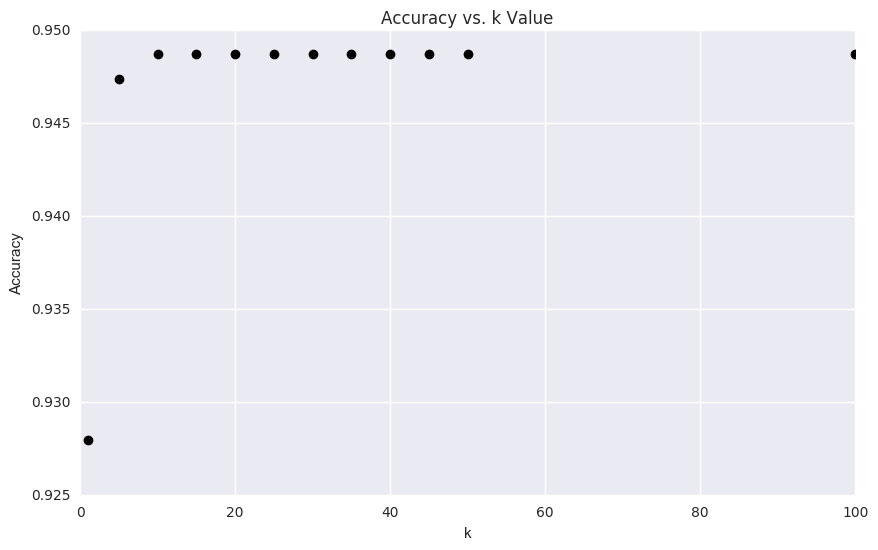

In [67]:
print(model_accD)

plt.plot(n_neighbors, model_accD, 'ko')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')

## Weekend Alcohol Consumption

In [68]:
#finding the best value of k:
model_accW = np.zeros(n_neighbors.shape)
for ind,k in enumerate(n_neighbors):    
    k_NN_modelW = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    y_predW = cross_val_predict(k_NN_modelW, X, yW, cv=2)
    model_accW[ind] = metrics.accuracy_score(y_true=yW, y_pred=y_predW)
    print(k)
    print(model_accW[ind])
    

1
0.747922437673
5
0.768698060942
10
0.778393351801
15
0.778393351801
20
0.792243767313
25
0.792243767313
30
0.792243767313
35
0.788088642659
40
0.789473684211
45
0.789473684211
50
0.789473684211
100
0.789473684211


[ 0.74792244  0.76869806  0.77839335  0.77839335  0.79224377  0.79224377
  0.79224377  0.78808864  0.78947368  0.78947368  0.78947368  0.78947368]


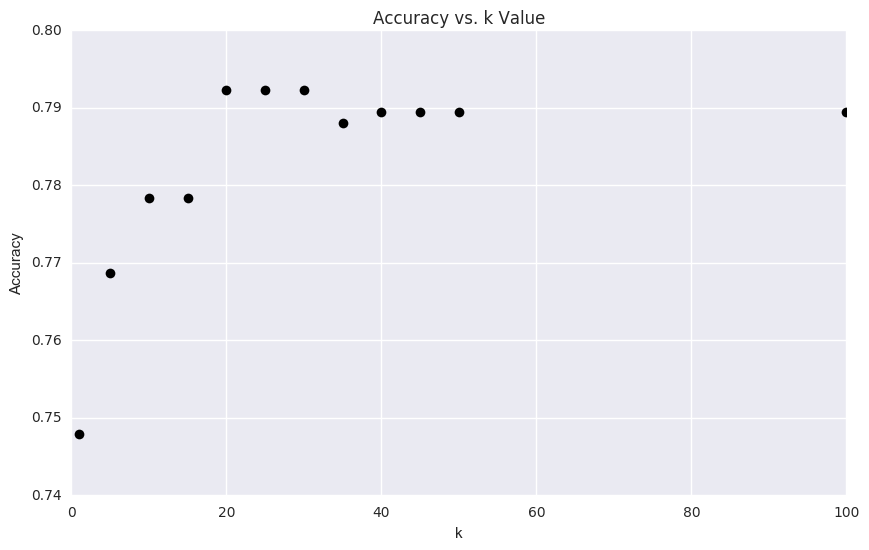

In [69]:
print(model_accW)

plt.plot(n_neighbors, model_accW, 'ko')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')

## k-NN Classification Confusion Matrices

In [70]:
print('k-NN (1) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN (5) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN (10) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN Weekend Confusion Matrix:')
k_NN_modelW = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')
k_NN_modelW.fit(X, yW)

y_predW = cross_val_predict(k_NN_modelW, X, yW, cv=2)

print(metrics.confusion_matrix(y_true = yW, y_pred = y_predW))
print('Accuracy = ', metrics.accuracy_score(y_true = yW, y_pred = y_predW))

k-NN (1) Weekday Confusion Matrix:
[[669  16]
 [ 36   1]]
Accuracy =  0.927977839335

k-NN (5) Weekday Confusion Matrix:
[[684   1]
 [ 37   0]]
Accuracy =  0.947368421053

k-NN (10) Weekday Confusion Matrix:
[[685   0]
 [ 37   0]]
Accuracy =  0.948753462604

k-NN Weekend Confusion Matrix:
[[567   3]
 [147   5]]
Accuracy =  0.792243767313


## Conclusions for k-NN Classification

We get higher accuracies when predicting high versus low alcohol consumption on weekdays compared to weekends. The value of k chosen for the k-NN model in the case of weekdays does not have an effect on the accuracy of the model for k's greater than or equal to 5. This ends up being true because the model gets the highest accuracy by always predicting low alcohol consumption (or almost always for lower k values), which is the majority of the data used for training. We can see this in the confusion matrix for a k value of 10 which shows the model correctly predicting 685 cases that were low alcohol consumption, and incorrectly predicting 37 to be low consumption. For a k value of 5, the model correctly predicts one rating as high alcohol consumption and incorrectly predicts one high alcohol consumption that is actually low. These model accuracies for predicting level of alcohol consumption on weekdays is 94.9% for k greater than or equal to 5 (which also happens to be the percentage of low alcohol consumption ratings in the dataset used for training the model for weekdays). A k value of 1 actually results in a decently accurate model with accuracy 92.8%, but it only correctly predicts 1 high alcohol consumption. It correctly predicts 669 low alcohol consumptions, but it also incorrectly predicts 16 cases as high consumption. Therefore, a value of 5 for k Nearest Neighbors appears to be the best choice for a model for weekday alcohol consumption.

The best model accuracy for predicting level of alcohol consumption on weekends was 79.2%, achieved for k between (and including) 20 and 30. This is 15.7% less accurate than the model for weekdays, but does more than just assume low alcohol consumption for any input variables. The confusion matrix shows the model correctly predicting high alcohol consumption in 5 cases and correctly predicting low alcohol consumption in 567 cases. This accuracy goes down if we split the data into more groups for cross-validation. Similar results are seen for k between 20 and 30, therefore a value of 25 was picked to represent the best value.

If we only consider the variables age, sex, how often students go out, and time spent on studying, the model accuracy for weekend predictions only increases by 2.2% (79.2% to 81.4%), which is still less than the higest accuracy of predicting consumption on weekdays. The accuracy for weekday predictions actually decreases when the predictive variables are limited. Accuracies also go down if we allow the alcohol consumption rating of '3' to be considered 'high' instead of 'low'.

It appears that while the weekday model is more accurate, the weekend model does a better job at trying to predict high alcohol consumption where there are cases of it instead of just asssuming everything leads to low consumption.

If we include a rating of 3 in the "high" category for predictions, the model accuracies go down, but the confusion matrices show the models doing a better job at trying to predict high alcohol consumption instead of assuming everything to be false. However, due to wording of the survey with 4 and 5 being "high" and "very high", we are going to use the split of 1, 2, and 3 for low alcohol consumption, and 4 and 5 for high alcohol consumption, as was shown in the analyses above.

## Using SVM Classification on the dataset

We will use the same binary variable by considering ratings 1-3 as low consumption and 4-5 as high consumption. This allows us to use classification to try to predict this categorical variable (high or low alcohol consumption) from the other features in the dataset. We will do this for weekend and weekday alcohol consumption separately.

To test accuracy of models, the cross_val_predict function was used, splitting the dataset into 2 for training and testing. The rbf kernel was used.

## Weekday Alcohol Consumption

In [71]:
#finding the best value of C

Cs = np.array([0.001, .1, 1, 10])

model_accDD = np.zeros(Cs.shape)
for ind,C in enumerate(Cs):    
    svm_modelD = svm.SVC(C=C,kernel='rbf')
    y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
    model_accDD[ind] = metrics.accuracy_score(y_true=yD, y_pred=y_predDD)
    print(C)
    print(model_accDD[ind])

0.001
0.948753462604
0.1
0.948753462604
1.0
0.948753462604
10.0
0.943213296399


## Weekend Alcohol Consumption

In [72]:
#finding the best value of C

Cs = np.array([2.1, 2.2, 2.3])

model_accWW = np.zeros(Cs.shape)
for ind,C in enumerate(Cs):    
    svm_modelW = svm.SVC(C=C,kernel='rbf')
    y_predWW = cross_val_predict(svm_modelW, X, yW, cv=2)
    model_accWW[ind] = metrics.accuracy_score(y_true=yW, y_pred=y_predWW)
    print(C)
    print(model_accWW[ind])

2.1
0.807479224377
2.2
0.806094182825
2.3
0.806094182825


## SVM Classification Confusion Matrices

In [73]:
print('SVM (C = 1) Weekday Confusion Matrix:')
svm_modelD = svm.SVC(C=1,kernel='rbf')
svm_modelD.fit(X, yD)

y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predDD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predDD))
print('')
print('SVM (C = 10) Weekday Confusion Matrix:')
svm_modelD = svm.SVC(C=10,kernel='rbf')
svm_modelD.fit(X, yD)

y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predDD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predDD))

print('')
print('SVM Weekend Confusion Matrix:')
svm_modelW = svm.SVC(C=2.2,kernel='rbf')
svm_modelW.fit(X, yW)

y_predWW = cross_val_predict(svm_modelW, X, yW, cv=2)
print(metrics.confusion_matrix(y_true = yW, y_pred = y_predWW))
print('Accuracy = ', metrics.accuracy_score(y_true = yW, y_pred = y_predWW))

SVM (C = 1) Weekday Confusion Matrix:
[[685   0]
 [ 37   0]]
Accuracy =  0.948753462604

SVM (C = 10) Weekday Confusion Matrix:
[[681   4]
 [ 37   0]]
Accuracy =  0.943213296399

SVM Weekend Confusion Matrix:
[[536  34]
 [106  46]]
Accuracy =  0.806094182825


## Conclusions for SVM Classification

We get higher accuracies when predicting high versus low alcohol consumption on weekdays compared to weekends, same as with k-NN Classification. The value of C chosen for the SVM model in the case of weekdays does not have an effect on the accuracy of the model for C's less than 3.4. This again ends up being true because the model gets the highest accuracy by always predicting low alcohol consumption, which is the majority of the data used for training as explained before. We can see this in the confusion matrix for a C value of 1 which shows the model correctly predicting 685 cases that were low alcohol consumption, and incorrectly predicts 37 to be low consumption. This is the exact result for k-NN classification. However, for a C value of 10, the model tries (and fails) to correctly predict 4 ratings as high alcohol consumption. These model accuracies for predicting level of alcohol consumption on weekdays is 94.9% for C less than 3.4 (which also happens to be the percentage of low alcohol consumption ratings in the dataset used for training the model for weekdays).

The best model accuracy for predicting level of alcohol consumption on weekends was 80.9%, achieved for a C value of 2.2. This is only 14% less accurate than the model for weekdays, but does more than just assume low alcohol consumption for any input variables. The confusion matrix shows the model correctly predicting high alcohol consumption in 47 cases and correctly predicting low alcohol consumption in 537 cases. This accuracy goes down if we split the data into more groups for cross-validation.

Similarly to the results for k_NN classification, it appears that while the weekday model is more accurate (identical to the k_NN model for high k values), the weekend model does a better job at trying to predict high alcohol consumption where there are cases of it instead of just asssuming everyone has low consumption. k_NN and SVM gave the same models of classification for the weekday, and had similar accuracies of around 80% for the weekends.

Similarly to the k-NN Classification, if we include a rating of 3 in the "high" category for predictions, the model accuracies go down, but the confusion matrices show the models doing a better job at trying to predict high alcohol consumption instead of assuming everything to be false. However, due to wording of the survey with 4 and 5 being "high" and "very high", we are going to use the split of 1, 2, and 3 for low alcohol consumption, and 4 and 5 for high alcohol consumption as analyzed above.

## Other Classification Algorithms
Some other classification algorithms were tried just to see if there were any surprising results

## Decision Trees

In [74]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

from sklearn import metrics
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score, KFold

from sklearn import tree

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif

from sklearn import svm

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

#import data
Cleaned_data = pd.read_csv("CleanData.csv")

In [75]:
predictors = ['Fedu', 'G1', 'G2', 'G3', 'Medu', 'absences', 'age', 
                'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                'higher_num', 'internet_num', 'romantic_num', 'paid_num']
Cleaned_data['Dalc_high'] = Cleaned_data['Dalc'].map({1:0, 2:0, 3:0, 4:1, 5:1})
Cleaned_data['Walc_high'] = Cleaned_data['Walc'].map({1:0, 2:0, 3:0, 4:1, 5:1})

y_dalc = Cleaned_data['Dalc_high'].as_matrix()
y_walc = Cleaned_data['Walc_high'].as_matrix()
X = Cleaned_data[predictors].as_matrix()

In [76]:
#split into test and training data
XTrain_dalc, XTest_dalc, yTrain_dalc, yTest_dalc = train_test_split(X, y_dalc, 
                                                    random_state=1, test_size=0.5)

XTrain_walc, XTest_walc, yTrain_walc, yTest_walc = train_test_split(X, y_walc, 
                                                    random_state=1, test_size=0.5)

In [77]:
#use all predictors in classification
decisionTree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=100)

# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain_walc, yTrain_walc)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain_walc)
# measure accuracy
#print('Accuracy on training data, all predictors= ', metrics.accuracy_score(y_true = yTrain_walc, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest_walc)
# measure accuracy
print('Accuracy, weekend = ', metrics.accuracy_score(y_true = yTest_walc, y_pred = y_pred))
print(metrics.confusion_matrix(y_true = yTest_walc, y_pred = y_pred))

Accuracy, weekend =  0.84487534626
[[258  23]
 [ 33  47]]


In [78]:
#### use all predictors in classification
decisionTree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=50)

# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain_dalc, yTrain_dalc)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain_dalc)
# measure accuracy
#print('Accuracy on training data, all predictors= ', metrics.accuracy_score(y_true = yTrain_dalc, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest_dalc)
# measure accuracy
print('Accuracy, weekday = ', metrics.accuracy_score(y_true = yTest_dalc, y_pred = y_pred))
print(metrics.confusion_matrix(y_true = yTest_dalc, y_pred = y_pred))

Accuracy, weekday =  0.941828254848
[[340   0]
 [ 21   0]]


# TODO: ADD DECISION TREE CONCLUSION

## Neural Networks

In [79]:
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_predict
from sklearn.neural_network import MLPClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [80]:
cleanData = pd.read_csv("CleanData.csv")
chosenColumns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']
cleanData = cleanData[chosenColumns]

In [81]:
# Define x and y (binary) variables for classification:

X = cleanData.drop(['Walc','Dalc'], axis=1).as_matrix()

Dalc = cleanData['Dalc'].as_matrix()
yD = Dalc > 3                             #"high" alcohol consumption = true
Walc = cleanData['Walc'].as_matrix()
yW = Walc > 3                             #"high" alcohol consumption = true

In [82]:
# Weekday drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresD = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredD = cross_val_predict(model, X, yD, cv=2)
    scoresD.append(metrics.accuracy_score(y_true=yD, y_pred=yPredD))
    print("Num Nodes =", nn, " || Accuracy =", scoresD[-1])

Num Nodes = 25  || Accuracy = 0.948753462604
Num Nodes = 50  || Accuracy = 0.5
Num Nodes = 75  || Accuracy = 0.0512465373961
Num Nodes = 100  || Accuracy = 0.914127423823
Num Nodes = 125  || Accuracy = 0.948753462604
Num Nodes = 150  || Accuracy = 0.947368421053
Num Nodes = 175  || Accuracy = 0.947368421053
Num Nodes = 200  || Accuracy = 0.923822714681


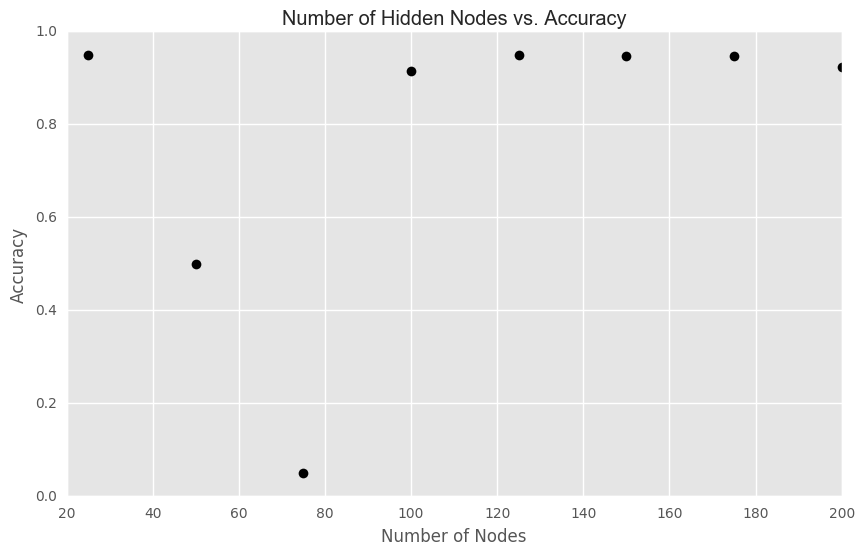

In [84]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Number of Hidden Nodes vs. Accuracy')
plt.plot(numNodes, scoresD, 'ko')

Due to neural networks random initialization, this plot will look different every time. After running it several times, we noticed that 125 nodes consistently produces good results.

In [85]:
# Weekend Drinking
numNodes = list(range(25,225,25))     # Number of nodes in hidden layer
scoresW = []
for i, nn in enumerate(numNodes):
    model = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    yPredW = cross_val_predict(model, X, yW, cv=2)
    scoresW.append(metrics.accuracy_score(y_true=yD, y_pred=yPredW))
    print("Num Nodes =", nn, " || Accuracy =", scoresW[-1])

Num Nodes = 25  || Accuracy = 0.502770083102
Num Nodes = 50  || Accuracy = 0.887811634349
Num Nodes = 75  || Accuracy = 0.940443213296
Num Nodes = 100  || Accuracy = 0.393351800554
Num Nodes = 125  || Accuracy = 0.947368421053
Num Nodes = 150  || Accuracy = 0.947368421053
Num Nodes = 175  || Accuracy = 0.945983379501
Num Nodes = 200  || Accuracy = 0.943213296399


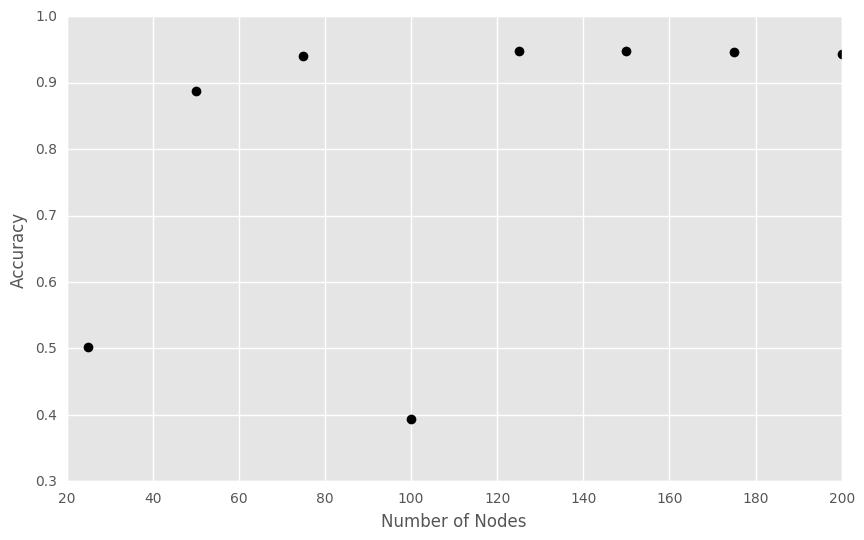

In [86]:
fig, ax1 = plt.subplots(1,1)
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.plot(numNodes, scoresW, 'ko')

125 Nodes still does ok. Let's stick with that.

In [87]:
nn = 125
modelD = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
modelW = MLPClassifier(hidden_layer_sizes=(nn, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
yPredD = cross_val_predict(modelD, X, yD, cv=2)
yPredW = cross_val_predict(modelW, X, yW, cv=2)

print("Weekday Confusion Matrix")
print(metrics.confusion_matrix(y_true = yD, y_pred = yPredD))
print(metrics.accuracy_score(y_true = yD, y_pred = yPredD))
print()

print("Weekend Confusion Matrix")
print(metrics.confusion_matrix(y_true = yW, y_pred = yPredW))
print(metrics.accuracy_score(y_true = yW, y_pred = yPredW))

Weekday Confusion Matrix
[[685   0]
 [ 37   0]]
0.948753462604

Weekend Confusion Matrix
[[564   6]
 [147   5]]
0.788088642659


Neural Networks behave similarly to the SVM classifier. It has high accuracy but does it by predicting mostly non-drinking. In addition, the weekend prediction capability is less than the weekday prediction capability.

# TODO: Add clustering, PCA, Survey, Conclusion